# Анализ поведения пользователей в мобильном приложении

## Материалы

[Презентация](https://drive.google.com/file/d/16DQg34V_F2sYVOoPWs2TQi8UERTMopcP/view?usp=sharing)

[Дашборд](https://public.tableau.com/views/_16625906579330/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)

## Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math as mth
from scipy import stats as st

### Mobile_sourсes

In [2]:
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_sourсes.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


**Исходные данные**

Согласно документации к данным:

Таблица ***mobile_sources.csv***:

* ***userId*** — идентификатор пользователя;
* ***source*** — источник, с которого пользователь установил приложение.

In [3]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [4]:
mobile_sourсes.duplicated().sum()

0

#### Вывод: 

Необходимо привести название столбца userId к оптимизированному формату для анализа. Пропусков и дубликатов не обнаружено.

### Mobile_dataset

In [5]:
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
mobile_dataset.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c



Таблица ***mobile_dataset.csv***:

* ***event.time*** — время совершения;
* ***event.name*** — название события;
* ***user.id*** —  идентификатор пользователя.

In [6]:
mobile_dataset['event.name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event.name, dtype: int64

Расшифровка событий: 

* ***advert_open*** — открытие карточки объявления;
* ***photos_show*** — просмотр фотографий в объявлении;
* ***tips_show*** —  пользователь увидел рекомендованные объявления;
* ***tips_click*** — пользователь кликнул по рекомендованному объявлению;
* ***contacts_show***, ***show_contacts*** —  пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления;
* ***contacts_call*** —  пользователь позвонил по номеру телефона на карточке объявления;
* ***map*** —  пользователь открыл карту размещенных объявлений;
* ***search_1*** - ***search_7*** —  разные события, связанные с поиском по сайту;
* ***favorites_add*** —  добавление объявления в избранное.

In [7]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [8]:
mobile_dataset.duplicated().sum()

0

#### Вывод: 

Необходимо привести название столбцов к оптимизированному формату для анализа. Пропусков и дубликатов также не обнаружено. Данные из столбца *event.time* необходимо преобраовать к нужному типу. Внутри данных столбца *event.name* считаю нужным сделать следующие изменения: 
1. Объединить события contacts_show и show_contacts, т.к. отображают одно и то же действие. 
2. Объединить события search_1 - search_7, т.к. заказчик не предоставил специфику различий между этими обозначениями.

### Вывод:

Нам достались "хорошие" данные. Пропусков и дубликатов нет. Необходимо привести названия столбцов к нужному формату, также мы приняли решение объединить некоторые данные. Не вижу смысла хранить информацию в двух датасетах, дальнейший анализ будет удобнее проводить на объединенных данных.

## Предобработка данных

### Mobile_sourсes

Переименуем столбец *userId*

In [9]:
mobile_sourсes = mobile_sourсes.rename(columns={'userId':'user_id'})
mobile_sourсes.head()

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


### Mobile_dataset

Переименуем столбцы

In [10]:
mobile_dataset = mobile_dataset.rename(columns={'event.time':'event_time', 'event.name':'event_name', 'user.id':'user_id'})
mobile_dataset.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Изменим тип данных

Объединим данные внутри event_name

In [11]:
mobile_dataset['event_name'] = mobile_dataset['event_name'].replace({'show_contacts':'contacts_show'})
mobile_dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7'], dtype=object)

In [12]:
#функция для замены неявных дубликатов
def replace_wrong_searches(wrong_searches, correct_search):
    for i in wrong_searches:
        mobile_dataset['event_name'] = mobile_dataset['event_name'].replace(i, correct_search)

In [13]:
# зададим неявные дубликаты search
wrong_searches = ['search_1','search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7']
# вызовим функцию
replace_wrong_searches(wrong_searches, correct_search = 'search')

In [14]:
mobile_dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

Изменим тип данных для даты

In [15]:
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'], format = '%Y-%m-%d %H:%M:%S')

In [16]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Объединим датасеты

In [17]:
df = mobile_sourсes.merge(mobile_dataset, on='user_id', how='left')
df.head()

,user_id,source,event_time,event_name
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00.431357,advert_open
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01.236320,tips_show
2,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07.039334,tips_show
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:27.770232,advert_open
4,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:34.804591,tips_show


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     74197 non-null  object        
 1   source      74197 non-null  object        
 2   event_time  74197 non-null  datetime64[ns]
 3   event_name  74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


### Вывод:
Теперь можно проводить исследования)

## Предварительный анализ

### Количество событий, количество пользователей, среднее количество событий на пользователя

Какое количество пользователей охватывают наши данные?

In [19]:
users = len(df.groupby('user_id').agg({'user_id': 'nunique'}))
print('Количество пользователей:', users)

Количество пользователей: 4293


Какое общее количество событий охватывают наши данные?

In [20]:
events = len(df)
print('Количество событий:', events)

Количество событий: 74197


Сколько в среднем событий приходится на пользователя?

In [21]:
event_per_user = events/users
print ('Cреднее количество событий на пользователя:', round(event_per_user,2))

Cреднее количество событий на пользователя: 17.28


### Период регистрации данных

In [22]:
df['date'] = df['event_time'].dt.date

In [23]:
print('Начало регистрации данных:',df['date'].min())

Начало регистрации данных: 2019-10-07


In [24]:
print('Конец регистрации данных:',df['date'].max())

Конец регистрации данных: 2019-11-03


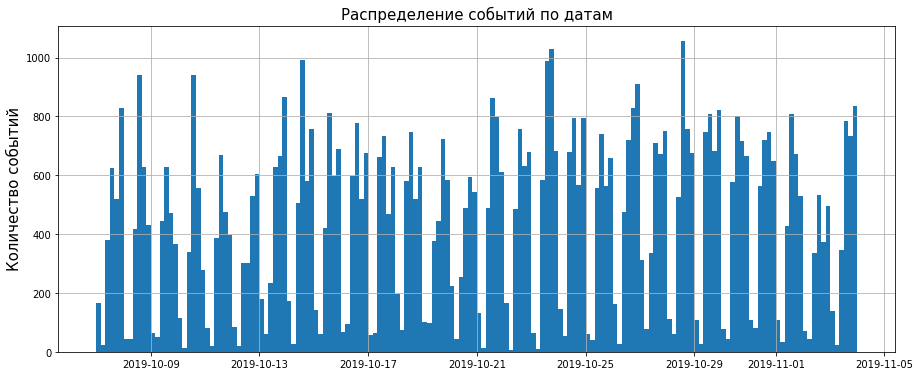

In [25]:
df['event_time'].hist(bins=7*24, figsize=(15, 6))

plt.title('Распределение событий по датам', size='15')
plt.ylabel('Количество событий', size='15')
plt.xlabel(None);

### Вывод:

Количество пользователей 4293, количество событий 74197, среднее количество событий на пользователя 17.28. Нам предоставили данные с 7 октября по 3 ноября 2019-го года (28 дней).

## Сегментация пользователей

### Выделение сеансов пользователей

Выделим и посчитаем количество сеансов пользователей по такой логике: если юзер не совершал никакое действие в течении 15-ти минут, то следущее его действие в приложении относится к другому сеансу.

In [26]:
df = df.sort_values(by = ['user_id', 'event_time'])
df['ts_prev'] = df.groupby('user_id').event_time.shift(1)

df['sec_diff_gt900'] = ((df.event_time - df.ts_prev) / np.timedelta64(1, 's') > 900).astype('int')
df['session_for_user'] = df.groupby('user_id').sec_diff_gt900.cumsum()
df['num_sess_for_user'] = df['session_for_user']+1
df

,user_id,source,event_time,event_name,date,ts_prev,sec_diff_gt900,session_for_user,num_sess_for_user
2171,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45.989359,tips_show,2019-10-07,NaT,0,0,1
2172,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31.052909,tips_show,2019-10-07,2019-10-07 13:39:45.989359,0,0,1
2173,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05.722489,tips_show,2019-10-07,2019-10-07 13:40:31.052909,0,0,1
2174,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20.735461,tips_show,2019-10-07,2019-10-07 13:41:05.722489,0,0,1
2175,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30.917502,tips_show,2019-10-07,2019-10-07 13:43:20.735461,0,0,1
...,...,...,...,...,...,...,...,...,...
19048,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:23.959572,tips_show,2019-11-03,2019-11-03 15:50:56.073089,0,35,36
19049,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:57.899997,contacts_show,2019-11-03,2019-11-03 15:51:23.959572,0,35,36
19050,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:07:40.932077,tips_show,2019-11-03,2019-11-03 15:51:57.899997,1,36,37
19051,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:08:18.202734,tips_show,2019-11-03,2019-11-03 16:07:40.932077,0,36,37


In [27]:
df.drop({'ts_prev','sec_diff_gt900', 'session_for_user'},inplace = True, axis = 1) #удалим вспмогательные столбцы

In [28]:
df.sample(10)

,user_id,source,event_time,event_name,date,num_sess_for_user
7606,f71afbca-b830-4a92-8d1d-03824a8d1b6e,other,2019-10-13 22:20:30.204103,photos_show,2019-10-13,19
63380,e7c6acab-b3e5-4b52-8abf-af0c37418668,yandex,2019-10-28 14:18:00.012073,tips_show,2019-10-28,2
67164,982150a2-d9e8-4976-a084-0a9de75bc84e,yandex,2019-10-30 08:44:04.806772,photos_show,2019-10-30,1
17441,cfd9b735-0bc2-448d-8d54-0019db8748a3,yandex,2019-10-13 22:38:25.148146,map,2019-10-13,7
49209,29564ae4-a8dd-4e7a-a75d-a85fb0acd5a2,google,2019-11-03 14:29:08.753852,search,2019-11-03,9
23046,53f821ae-d4a7-4621-bbc4-d7a97cad0985,yandex,2019-10-13 15:05:12.294320,photos_show,2019-10-13,1
17516,cfd9b735-0bc2-448d-8d54-0019db8748a3,yandex,2019-10-15 21:05:50.960583,advert_open,2019-10-15,17
37161,a5b2560d-e6ab-4dc8-b67b-cfaa01785150,yandex,2019-10-17 21:05:57.834261,tips_show,2019-10-17,2
9189,0d9e5bb7-0ad6-4b62-a118-b1e4f5b31dfa,yandex,2019-10-24 17:47:13.305979,advert_open,2019-10-24,16
29508,06ce9653-a84d-4a9c-b899-3336d77e73f5,yandex,2019-10-15 13:13:22.166165,tips_show,2019-10-15,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 2171 to 19052
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            74197 non-null  object        
 1   source             74197 non-null  object        
 2   event_time         74197 non-null  datetime64[ns]
 3   event_name         74197 non-null  object        
 4   date               74197 non-null  object        
 5   num_sess_for_user  74197 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.0+ MB


Создадим таблицу, в которую войдут данные для каждого пользователя: 
1. id пользователя
2. количество сеансов
3. количество событий
4. среднее количество событий за сеанс
5. cреднее количество сеансов в день
6. среднее количество сеансов в неделю

In [30]:
sessions = df.groupby('user_id').agg({'num_sess_for_user':'max', 'event_name':'count'}).reset_index()
sessions.columns = ['user_id', 'number_of_sessions','number_of_events']
sessions['events_per_session'] = round(sessions['number_of_events']/sessions['number_of_sessions'],2)
sessions['sessions_per_day'] = round(sessions['number_of_sessions']/28,2)
sessions['sessions_per_week'] = round(sessions['number_of_sessions']/4,2)
sessions.sample(10)

,user_id,number_of_sessions,number_of_events,events_per_session,sessions_per_day,sessions_per_week
3419,cc2602d5-bfe8-4740-a9d5-791023b63f5e,2,11,5.50,0.07,0.50
539,1c9fdb6e-1125-43f6-ae99-cdc3cd6cb4dc,3,22,7.33,0.11,0.75
2673,9f689c1a-a1c2-4406-8677-b97c74681047,3,4,1.33,0.11,0.75
442,1754e696-63c3-4a49-886f-17fbbfe71441,2,11,5.50,0.07,0.50
3664,da2cae1f-51d7-4756-b87c-0f0ad6809bc9,1,3,3.00,0.04,0.25
3316,c6f558bf-35dd-4074-978c-41fdc4da9a60,5,18,3.60,0.18,1.25
3195,bff52fae-1d6e-4693-ae09-54d8036139c0,2,5,2.50,0.07,0.50
2276,877652a5-b622-4f06-9e5f-f93c67421152,2,5,2.50,0.07,0.50
3141,bd0a750d-c859-46e0-b181-bf3277ab9677,2,4,2.00,0.07,0.50
1292,4c505d66-04a5-4c8a-bde5-e054a2f065aa,2,7,3.50,0.07,0.50


In [31]:
sessions.describe()

,number_of_sessions,number_of_events,events_per_session,sessions_per_day,sessions_per_week
count,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000
mean,2.687398,17.283252,7.649350,0.097864,0.671850
std,4.173946,29.130677,7.769742,0.148206,1.043487
min,1.000000,1.000000,1.000000,0.040000,0.250000
25%,1.000000,5.000000,3.170000,0.040000,0.250000
50%,2.000000,9.000000,5.250000,0.070000,0.500000
75%,3.000000,17.000000,9.000000,0.110000,0.750000
max,116.000000,478.000000,104.000000,4.140000,29.000000


Посмотрев на эти показатели, я принимаю решение сегментировать пользователей по количеству событий за сессию. Остальные параметры, которые имеют привязку только к сеансам пользователей, очень слабо различаются между друг другом.

#### Вывод:

1. Приняли решение сегментировать пользователей по количеству событий за сессию. Тогда портреты сегментов будут наиболее интересными и значимо отличаться друг от друга.

2. Среднее значение больше медианы, а медиана сильно отличается от максимальных значений. Видимо в данные закрались выбросы. Или гиперактивные пользователи!

### Поиск и устранение выбросов

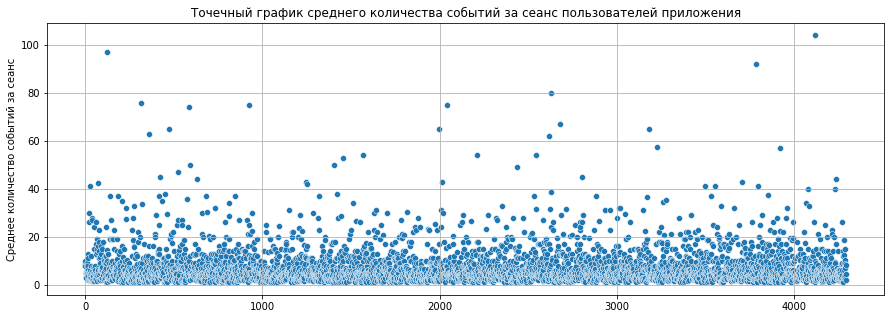

In [32]:
x_values = pd.Series(range(0,sessions['user_id'].count()))
plt.figure(figsize=(15, 5))
sns.scatterplot(x=x_values, y="events_per_session", data=sessions)
plt.grid()
plt.title('Точечный график среднего количества событий за сеанс пользователей приложения')
plt.ylabel('Среднее количество событий за сеанс');


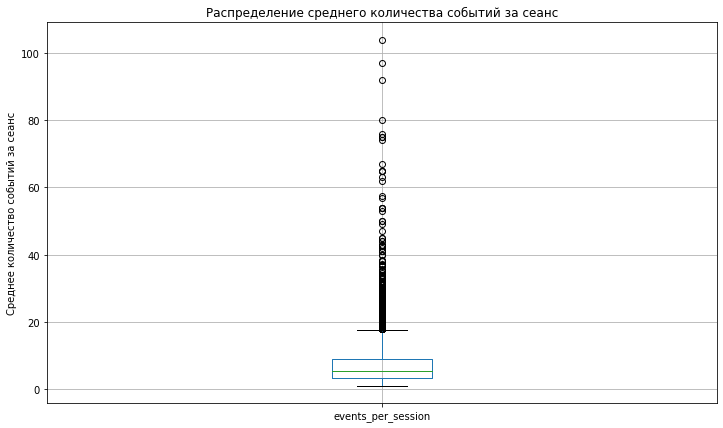

In [33]:
sessions.boxplot(column='events_per_session', figsize=(12, 7))

plt.title('Распределение среднего количества событий за сеанс')
plt.ylabel('Среднее количество событий за сеанс')

plt.show()

На графиках видно, что основное количество сеансов колеблется в районе до 40-ка 

In [34]:
for q in range(90, 100, 1):
    print(f"{q / 100} квантиль = {sessions['events_per_session'].quantile(q=(q / 100))}")

0.9 квантиль = 15.0
0.91 квантиль = 16.0
0.92 квантиль = 17.0
0.93 квантиль = 18.0
0.94 квантиль = 19.581599999999927
0.95 квантиль = 21.0
0.96 квантиль = 23.0
0.97 квантиль = 26.0
0.98 квантиль = 30.0
0.99 квантиль = 37.026399999999974


Судя по квантилям, если мы уберем пользователей, которые в среднем за исследуемый период совершали больше 37-ми событий за сеанс, то потеряем примерно один процент исследуемых пользователей. Что в принципе некритично.

In [35]:
sessions = sessions.query('events_per_session < 37')

In [36]:
for q in range(90, 100, 1):
    print(f"{q / 100} квантиль = {sessions['number_of_sessions'].quantile(q=(q / 100))}")

0.9 квантиль = 5.0
0.91 квантиль = 5.0
0.92 квантиль = 6.0
0.93 квантиль = 6.0
0.94 квантиль = 7.0
0.95 квантиль = 8.0
0.96 квантиль = 9.0
0.97 квантиль = 10.0
0.98 квантиль = 13.0
0.99 квантиль = 19.0


#### Вывод

Убрали пользователей, которые совершили больше сорока сеансов. Эти данные сильно выбивались из общей картины. Устранив выбросы мы сможем намного структурнее сегментировать пользователей.

### Выделение сегментов пользователей по среднему количеству событий за сеанс

In [37]:
sessions.describe()

,number_of_sessions,number_of_events,events_per_session,sessions_per_day,sessions_per_week
count,4241.000000,4241.000000,4241.000000,4241.000000,4241.000000
mean,2.704079,16.663287,7.105100,0.098439,0.676020
std,4.195731,28.320592,5.763659,0.148988,1.048933
min,1.000000,1.000000,1.000000,0.040000,0.250000
25%,1.000000,5.000000,3.000000,0.040000,0.250000
50%,2.000000,9.000000,5.000000,0.070000,0.500000
75%,3.000000,17.000000,9.000000,0.110000,0.750000
max,116.000000,478.000000,36.500000,4.140000,29.000000


Удалим остальные показатели, на которые мы не будем ориентироваться (я смотрел, как они себя ведут при изменениях - там ничего интересного).

In [38]:
sessions.drop({'number_of_events', 'sessions_per_day', 'sessions_per_week'},inplace = True, axis = 1)

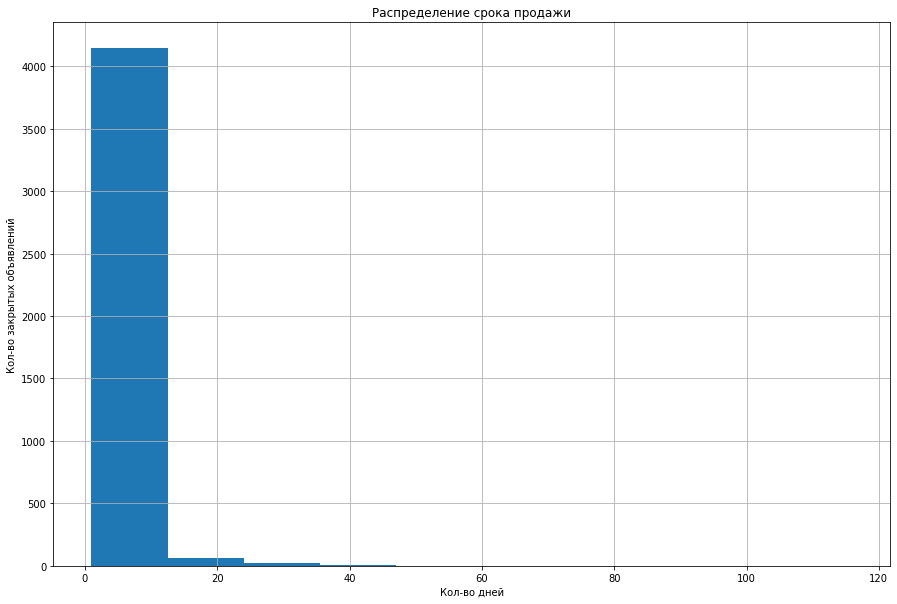

In [39]:
sessions.hist(column='number_of_sessions', figsize=(15, 10), bins=10)

plt.title('Распределение срока продажи')
plt.xlabel('Кол-во дней')
plt.ylabel('Кол-во закрытых объявлений')

plt.show()

**Новички приложения**

Общую картину, мне кажется, сильно скашивают данные с пользователями, которые совершили всего один сеанс за все исследуемое время. Выделим их в отдельный сегмент. *Сегмент новичков приложения*.

In [40]:
new_users = sessions.query('number_of_sessions == 1').reset_index()
print ('Количество пользователей в сегменте новичков:', len(new_users))
new_users.head(10)

Количество пользователей в сегменте новичков: 2034


,index,user_id,number_of_sessions,events_per_session
0,2,00463033-5717-4bf1-91b4-09183923b9df,1,10.0
1,6,005fbea5-2678-406f-88a6-fbe9787e2268,1,5.0
2,7,00653802-5ff1-4071-bc17-347fc4cef569,1,5.0
3,8,006a32d4-ee10-40dc-b237-11e0fde81cbc,1,6.0
4,9,006f6ced-225b-4f9c-9f17-23404bc6835f,1,5.0
5,11,007d031d-5018-4e02-b7ee-72a30609173f,1,9.0
6,12,009c0f37-8556-4c72-a007-100e28a37373,1,8.0
7,14,00aa4003-366b-4788-ad1f-506f2b51b8cb,1,6.0
8,15,00af35c4-2045-4960-96b8-7fd5f1978a88,1,5.0
9,17,00ba2474-01c3-481a-8cf2-6d4636a8a1ca,1,13.0


In [41]:
sessions = sessions.query('number_of_sessions > 1')

**Сегмент малоактивных пользователей**

In [42]:
sessions.describe()

,number_of_sessions,events_per_session
count,2207.000000,2207.000000
mean,4.274581,5.773779
std,5.356367,5.045494
min,2.000000,1.000000
25%,2.000000,2.500000
50%,3.000000,4.000000
75%,4.000000,7.075000
max,116.000000,36.500000


Теперь выделим *сегмент малоактивных пользователей* - в среднем до четырех событий за сеанс (медианное значение).

In [43]:
inactive_users = sessions.query('events_per_session <= 4')
print ('Количество малоактивных пользователей:', len(inactive_users))
inactive_users.head(10)

Количество малоактивных пользователей: 1138


,user_id,number_of_sessions,events_per_session
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,9,3.56
4,00551e79-152e-4441-9cf7-565d7eb04090,3,2.67
16,00b59e77-3dc8-4193-a217-c50b9fe849bf,2,3.50
22,013bbb57-ca6f-4af3-b586-4a046d3d3dee,6,2.50
26,0164902d-7393-47e1-9d5b-0ec4c0171cdc,3,2.33
34,01d283e1-cb1c-407a-a4e0-9f72f3deecca,5,2.00
39,0216e1bd-0984-4ba4-a2b2-c186bf56b6f9,2,1.50
40,0236feca-f39b-45c1-9de5-b5ee51e0aa9b,2,4.00
41,024828cf-c873-43e6-8c7e-96aeb348699e,5,2.00
42,02945421-8f8c-4823-8e8b-3e9aca9eee59,3,3.67


In [44]:
sessions = sessions.query('events_per_session > 4')

**Сегмент среднеактивных пользователей**

In [45]:
sessions.describe()

,number_of_sessions,events_per_session
count,1069.000000,1069.000000
mean,4.489242,9.147877
std,5.586159,5.456386
min,2.000000,4.100000
25%,2.000000,5.500000
50%,3.000000,7.380000
75%,4.000000,10.670000
max,79.000000,36.500000


Среднеактивными пользователями примем тех, кто в среднем совершает до десяти событий за сеанс (75-ый квантиль).

In [46]:
medium_active_users = sessions.query('events_per_session <= 10')
print ('Количество среднеактивных пользователей:', len(medium_active_users))
medium_active_users.head(10)

Количество среднеактивных пользователей: 768


,user_id,number_of_sessions,events_per_session
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,8.75
1,00157779-810c-4498-9e05-a1e9e3cedf93,9,7.89
5,00554293-7e00-4122-b898-4e892c4a7c53,2,5.50
10,00753c79-ea81-4456-acd0-a47a23ca2fb9,4,4.50
13,00a93a72-3bbc-4ee7-8a81-7134f45ae009,3,5.00
33,01b80a0a-f51b-4061-a485-8ceeb626a3f9,3,5.00
36,02012123-f8ee-40f4-8ccd-c5859f3fbc41,4,5.75
44,02c90994-8de8-49e8-a384-415fb1602ac5,8,5.00
45,02d68ba9-300f-44cd-aefb-b9905cc550a0,2,7.50
51,03739d15-7212-415c-9c88-4dfc24b8d3b5,2,5.00


**Сегмент активных пользователей**

Активными пользователями будем считать тех, кто совершает в среднем более десяти событий за сеанс.

In [47]:
active_users = sessions.query('events_per_session > 10')
print ('Количество активных пользователей:', len(active_users))
active_users.head(10)

Количество активных пользователей: 301


,user_id,number_of_sessions,events_per_session
67,04adf25e-cb60-4cbd-bedc-ddc1057cde06,8,13.75
76,04fb9b01-30bb-49f4-bbaa-e095c0bbff18,3,11.00
77,050311ed-1ddd-48d8-8195-ae327f905427,2,14.00
84,056dec65-545a-4123-b95d-3ca96ed31133,3,11.67
91,05b35678-bbc6-47f0-b552-ab639249a0d4,6,16.17
121,076f2de3-268b-4cf1-ade7-73d09752e3b3,3,14.33
151,08b25050-2a3d-48af-bb45-ac437ec7ed3d,2,19.00
162,094abcd3-4022-4e55-94f9-e416a4416752,2,23.00
181,0a59892f-3578-484b-af84-eb3b2298fb8c,6,10.83
189,0b090b44-12c0-4292-8f4b-bee2424512b6,3,13.00


#### Вывод:

На равные доли сегментов нам не удалось разбить пользователей, но, как мне кажется, получилось выделить наиболее отличающийся параметр - среднее количество событий за один сеанс.

### Вывод:

Сегментировали пользователей по среднему количеству событий за сессию на четыре группы:

1. Пользователи-новички. Провели всего один сеанс в приложении. Зашли в приложение случайно, или единично воспользовались? Ясно только одно: никто не знает, вернутся ли они в приложение снова). Всего: 2034 (почти 50% пользователей).
2. Малоактивные пользователи. В среднем совершают до четырех событий за сеанс. Либо сразу находят то, что хотят, либо ограничиваются просмотром пары объявлений. Скорее всего переходят на объявление с товаром по ссылке из внешнего источника. Всего: 1138.
3. Среднеактивные пользователи. В среднем совершают от четырех до десяти событий за сеанс. Можно назвать полноценными пользователями приложения. Всего: 768 
4. Активные пользователи. Больше десяти действий за сеанс. Активно пользуются приложением и будем надеяться регулярно. Всего: 301.

## Исследовательский анализ

Рассчитаем метрики внутри выделенных сегментов

### Retantion Rate «коэффициент удержания»

Сформируем когорты по данным за неделю:

In [48]:
first_activity_date = df.groupby(['user_id'])['event_time'].min()
first_activity_date.name = 'first_activity_date'
df = df.merge(first_activity_date, on='user_id', how='inner') 
df.head()

,user_id,source,event_time,event_name,date,num_sess_for_user,first_activity_date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45.989359,tips_show,2019-10-07,1,2019-10-07 13:39:45.989359
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31.052909,tips_show,2019-10-07,1,2019-10-07 13:39:45.989359
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05.722489,tips_show,2019-10-07,1,2019-10-07 13:39:45.989359
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20.735461,tips_show,2019-10-07,1,2019-10-07 13:39:45.989359
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30.917502,tips_show,2019-10-07,1,2019-10-07 13:39:45.989359


In [49]:
df['activity_week'] = df['event_time'].astype('datetime64[W]')
df['first_activity_week'] = df['first_activity_date'].astype('datetime64[W]')
df.head()

,user_id,source,event_time,event_name,date,num_sess_for_user,first_activity_date,activity_week,first_activity_week
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45.989359,tips_show,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-03,2019-10-03
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31.052909,tips_show,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-03,2019-10-03
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05.722489,tips_show,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-03,2019-10-03
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20.735461,tips_show,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-03,2019-10-03
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30.917502,tips_show,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-03,2019-10-03


Рассчитаем lifetime каждого пользователя в рамках когорты.

In [50]:
df['cohort_lifetime'] = df['activity_week'] - df['first_activity_week']
df['cohort_lifetime'] = df['cohort_lifetime'] / np.timedelta64(1,'W')
df['cohort_lifetime'] = df['cohort_lifetime'].astype('int') 

Дальше будем рассмотривать Retantion Rate внутри каждого сегмента по отдельности

#### Новички приложения

Retantion Rate - коэфициент удержания, который показывает сколько пользователей из когорты относительно их изначального числа вернулись в приложение еще раз. Но про пользователей-новичков мы знаем, что они совершили только один сеанс и больше в приложении не возвращались, так что рассчитывать эту метрику для данного сегмента нецелесообразно.

#### Малоактивные пользователи

In [51]:
inactive_users_1 = df.merge(inactive_users, on='user_id', how='inner')

Посчитаем для каждой когорты количество активных пользователей на определённую «неделю жизни»

In [52]:
cohorts = inactive_users_1.groupby(['first_activity_week','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 
cohorts

,first_activity_week,cohort_lifetime,user_id
0,2019-10-03,0,158
1,2019-10-03,1,78
2,2019-10-03,2,49
3,2019-10-03,3,30
4,2019-10-03,4,19
5,2019-10-10,0,318
6,2019-10-10,1,135
7,2019-10-10,2,92
8,2019-10-10,3,43
9,2019-10-17,0,325


Найдём исходное количество пользователей в когорте:

In [53]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week','user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'}) 
initial_users_count

,first_activity_week,cohort_users
0,2019-10-03,158
5,2019-10-10,318
9,2019-10-17,325
12,2019-10-24,241
14,2019-10-31,96


Наконец-то можем посчитать Retention Rate:

In [54]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_week') 
cohorts['retention'] = round(cohorts['user_id']/cohorts['cohort_users'], 2)
cohorts

,first_activity_week,cohort_lifetime,user_id,cohort_users,retention
0,2019-10-03,0,158,158,1.00
1,2019-10-03,1,78,158,0.49
2,2019-10-03,2,49,158,0.31
3,2019-10-03,3,30,158,0.19
4,2019-10-03,4,19,158,0.12
5,2019-10-10,0,318,318,1.00
6,2019-10-10,1,135,318,0.42
7,2019-10-10,2,92,318,0.29
8,2019-10-10,3,43,318,0.14
9,2019-10-17,0,325,325,1.00


Построим тепловую карту

In [55]:
retention_pivot = cohorts.pivot_table(index='first_activity_week',columns='cohort_lifetime',values='retention',aggfunc='sum') 

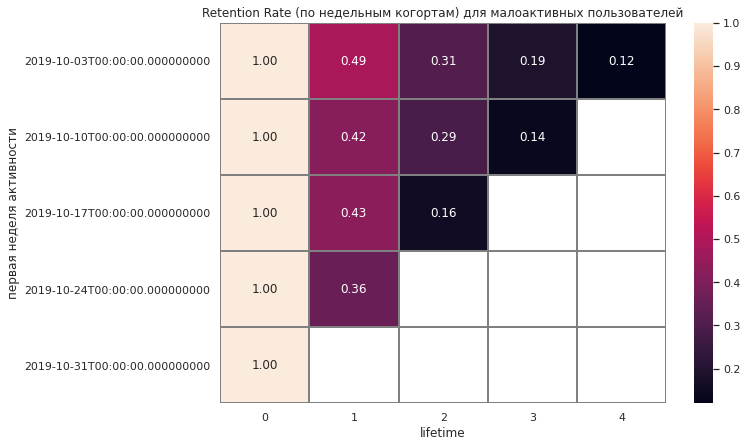

In [56]:
sns.set(style='white')
plt.figure(figsize=(10, 7))
plt.title('Retention Rate (по недельным когортам) для малоактивных пользователей')
sns.heatmap(retention_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='grey')
plt.gca().set(xlabel='lifetime', ylabel='первая неделя активности')
plt.show()

##### Вывод:

Коэффциент удержания за исследуемый период с 49-ти % упал до 12-ти. Для первой и второй когорты неплохие показатели на втором лайфтайме. Больше гордиться нечем.


#### Среднеактивные пользователи

In [57]:
medium_active_users_1 = df.merge(medium_active_users, on='user_id', how='inner')

In [58]:
cohorts = medium_active_users_1.groupby(['first_activity_week','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 
cohorts

,first_activity_week,cohort_lifetime,user_id
0,2019-10-03,0,108
1,2019-10-03,1,51
2,2019-10-03,2,32
3,2019-10-03,3,22
4,2019-10-03,4,18
5,2019-10-10,0,225
6,2019-10-10,1,92
7,2019-10-10,2,62
8,2019-10-10,3,28
9,2019-10-17,0,207


In [59]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week','user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'}) 
initial_users_count

,first_activity_week,cohort_users
0,2019-10-03,108
5,2019-10-10,225
9,2019-10-17,207
12,2019-10-24,172
14,2019-10-31,56


In [60]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_week') 
cohorts['retention'] = round(cohorts['user_id']/cohorts['cohort_users'], 2)
cohorts

,first_activity_week,cohort_lifetime,user_id,cohort_users,retention
0,2019-10-03,0,108,108,1.00
1,2019-10-03,1,51,108,0.47
2,2019-10-03,2,32,108,0.30
3,2019-10-03,3,22,108,0.20
4,2019-10-03,4,18,108,0.17
5,2019-10-10,0,225,225,1.00
6,2019-10-10,1,92,225,0.41
7,2019-10-10,2,62,225,0.28
8,2019-10-10,3,28,225,0.12
9,2019-10-17,0,207,207,1.00


In [61]:
retention_pivot = cohorts.pivot_table(index='first_activity_week', columns='cohort_lifetime', values='retention', aggfunc='sum') 

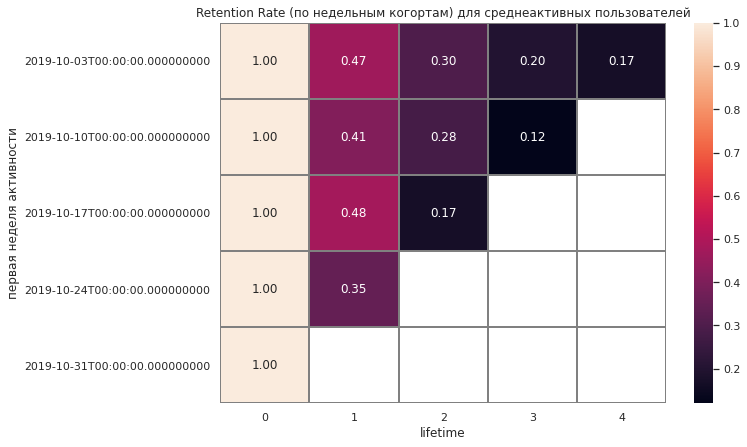

In [62]:
sns.set(style='white')
plt.figure(figsize=(10, 7))
plt.title('Retention Rate (по недельным когортам) для среднеактивных пользователей')
sns.heatmap(retention_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='grey')
plt.gca().set(xlabel='lifetime', ylabel='первая неделя активности')
plt.show()

##### Вывод:

В третей когорте начальные коэффициент чуть-чуть выше, чем в первой. Опять неплохие показатели для первой и второй когорты на втором лайфтайме.

#### Активные пользователи

In [63]:
active_users_1 = df.merge(active_users, on='user_id', how='inner')

In [64]:
cohorts = active_users_1.groupby(['first_activity_week','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 
cohorts

,first_activity_week,cohort_lifetime,user_id
0,2019-10-03,0,45
1,2019-10-03,1,18
2,2019-10-03,2,11
3,2019-10-03,3,8
4,2019-10-03,4,1
5,2019-10-10,0,88
6,2019-10-10,1,32
7,2019-10-10,2,19
8,2019-10-10,3,8
9,2019-10-17,0,70


In [65]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week','user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'}) 
initial_users_count

,first_activity_week,cohort_users
0,2019-10-03,45
5,2019-10-10,88
9,2019-10-17,70
12,2019-10-24,76
14,2019-10-31,22


In [66]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_week') 
cohorts['retention'] = round(cohorts['user_id']/cohorts['cohort_users'], 2)
cohorts

,first_activity_week,cohort_lifetime,user_id,cohort_users,retention
0,2019-10-03,0,45,45,1.00
1,2019-10-03,1,18,45,0.40
2,2019-10-03,2,11,45,0.24
3,2019-10-03,3,8,45,0.18
4,2019-10-03,4,1,45,0.02
5,2019-10-10,0,88,88,1.00
6,2019-10-10,1,32,88,0.36
7,2019-10-10,2,19,88,0.22
8,2019-10-10,3,8,88,0.09
9,2019-10-17,0,70,70,1.00


In [67]:
retention_pivot = cohorts.pivot_table(index='first_activity_week', columns='cohort_lifetime', values='retention', aggfunc='sum') 

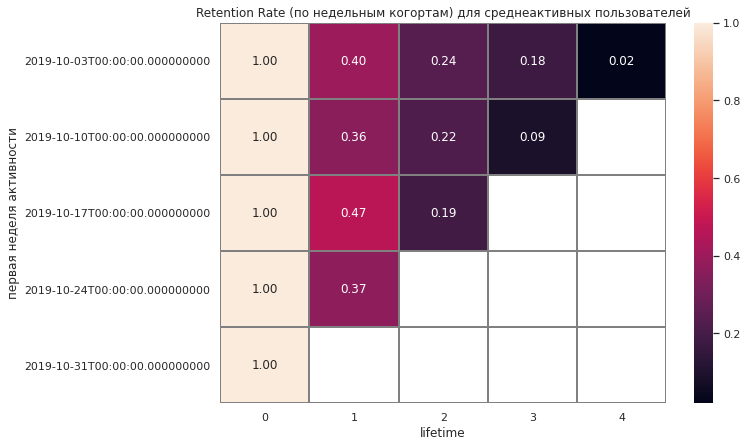

In [68]:
sns.set(style='white')
plt.figure(figsize=(10, 7))
plt.title('Retention Rate (по недельным когортам) для среднеактивных пользователей')
sns.heatmap(retention_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='grey')
plt.gca().set(xlabel='lifetime', ylabel='первая неделя активности')
plt.show()

##### Вывод:

Начальный коэфициент в третьей когорте выше, чем в первой. С каждым лайфтаймом коэфциент все ниже и для первой когорты снизился до 2%.

### Общий вывод о Retention Rate:

Малоактивные и среднеактивные пользователи более-менее регулярно пользуются приложением. Активные пользователи очень непостоянны. Во всех сегментах с каждой новой когортой поведение покупателей меняется.

### Время проведенное в приложении

Заведем столбец active_session, где будет отображаться длительность сеанса

In [69]:
time = df[{'user_id','num_sess_for_user','event_time'}]
time.head()

,user_id,num_sess_for_user,event_time
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45.989359
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:40:31.052909
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:41:05.722489
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:43:20.735461
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:45:30.917502


In [70]:
time['pre_action_time'] = time.groupby(['user_id','num_sess_for_user'])['event_time'].shift(1)
time['time_of_event'] = time['event_time'] - time['pre_action_time']
time.head()

/tmp/ipykernel_387/3125900229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['pre_action_time'] = time.groupby(['user_id','num_sess_for_user'])['event_time'].shift(1)
/tmp/ipykernel_387/3125900229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['time_of_event'] = time['event_time'] - time['pre_action_time']


,user_id,num_sess_for_user,event_time,pre_action_time,time_of_event
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45.989359,NaT,NaT
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:40:31.052909,2019-10-07 13:39:45.989359,0 days 00:00:45.063550
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:41:05.722489,2019-10-07 13:40:31.052909,0 days 00:00:34.669580
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:43:20.735461,2019-10-07 13:41:05.722489,0 days 00:02:15.012972
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:45:30.917502,2019-10-07 13:43:20.735461,0 days 00:02:10.182041


Заведем таблицу с данными о длительности сеанса

In [71]:
sess_time = time.groupby(['user_id','num_sess_for_user'])['event_time'].max() - time.groupby(['user_id','num_sess_for_user'])['event_time'].min()
sess_time = pd.DataFrame(sess_time).reset_index()
sess_time = sess_time.rename(columns={'event_time':'active_session'})
sess_time

,user_id,num_sess_for_user,active_session
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:09:55.727258
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,0 days 00:08:27.385985
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,0 days 00:14:59.272096
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,0 days 00:12:38.171767
4,00157779-810c-4498-9e05-a1e9e3cedf93,1,0 days 00:25:20.787329
...,...,...,...
11532,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,33,0 days 00:00:00
11533,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,34,0 days 00:04:56.677281
11534,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,35,0 days 00:15:48.307055
11535,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,36,0 days 00:15:56.892557


In [72]:
sess_time['active_session'].describe()

count                        11537
mean     0 days 00:09:26.452376136
std      0 days 00:14:11.187615792
min                0 days 00:00:00
25%         0 days 00:00:04.920509
50%         0 days 00:04:19.395270
75%         0 days 00:13:03.256039
max         0 days 03:53:38.911775
Name: active_session, dtype: object

Среднее значение длительности сессии среди всех пользователей составляет 9 минуту 26 секунды, медианное - 4 минуты 19 секунд.

Общее время для всех пользователей в приложении за используемый период:

In [73]:
all_time = sess_time.groupby('user_id')['active_session'].sum()
all_time = pd.DataFrame(all_time).reset_index()
all_time = all_time.rename(columns={'active_session':'all_sess_time'})
all_time

,user_id,all_sess_time
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0 days 00:46:00.557106
1,00157779-810c-4498-9e05-a1e9e3cedf93,0 days 02:07:50.864520
2,00463033-5717-4bf1-91b4-09183923b9df,0 days 00:24:42.475025
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,0 days 00:48:04.069298
4,00551e79-152e-4441-9cf7-565d7eb04090,0 days 00:09:19.664543
...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,0 days 00:49:25.224889
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,0 days 00:00:52.138456
4290,ffcf50d9-293c-4254-8243-4890b030b238,0 days 00:01:20.378132
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,0 days 00:38:52.591039


In [74]:
all_time['all_sess_time'].describe()

count                         4293
mean     0 days 00:25:22.283033655
std      0 days 00:47:16.327769746
min                0 days 00:00:00
25%         0 days 00:05:32.091664
50%         0 days 00:12:57.739509
75%         0 days 00:27:28.375929
max         0 days 18:08:57.769644
Name: all_sess_time, dtype: object

Среднее значение общего времени в приложении всех пользователей составляет 25 минуту 22 секунды, медианное - 12 минуты 57 секунд.

Посмотрим на среднюю продолжительность сессий внутри каждого сегмента

#### Новички приложения

In [75]:
new_users_2 = sess_time.merge(new_users, on='user_id', how='inner')

In [76]:
new_users_2['active_session'].describe()

count                         2034
mean     0 days 00:12:43.598449206
std      0 days 00:12:20.943413542
min                0 days 00:00:00
25%      0 days 00:04:28.675410500
50%      0 days 00:09:09.162975500
75%         0 days 00:17:29.374812
max         0 days 02:04:10.111856
Name: active_session, dtype: object

#### Вывод:

Новички приложения совершают всего одну сессию и средняя её продолжительность составляет 12 минут 43 секунды

#### Малоактивные пользователи

In [77]:
inactive_users_2 = sess_time.merge(inactive_users, on='user_id', how='inner')
inactive_users_2.head()

,user_id,num_sess_for_user,active_session,number_of_sessions,events_per_session
0,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,1,0 days 00:03:35.164635,9,3.56
1,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2,0 days 00:01:23.599640,9,3.56
2,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,3,0 days 00:07:37.606806,9,3.56
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,4,0 days 00:05:36.489828,9,3.56
4,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,5,0 days 00:09:59.802950,9,3.56


На сеансах с продолжительностью 0 совершилось только одно действие.

Средняя продолжительность сеансов пользователей:

In [78]:
inactive_users_2['active_session'].describe()

count                         4635
mean     0 days 00:03:46.216877326
std      0 days 00:06:27.694895025
min                0 days 00:00:00
25%                0 days 00:00:00
50%         0 days 00:00:40.891098
75%         0 days 00:04:55.096910
max         0 days 01:04:00.810168
Name: active_session, dtype: object

Общая продолжительность проведенного времени в приложении отдельно по пользователям

In [79]:
inactive_users_2 = all_time.merge(inactive_users, on='user_id', how='inner')

In [80]:
inactive_users_2['all_sess_time'].describe()

count                         1138
mean     0 days 00:15:21.366631289
std      0 days 00:29:42.062018778
min                0 days 00:00:00
25%         0 days 00:03:16.980669
50%         0 days 00:08:33.964059
75%      0 days 00:17:21.510244250
max         0 days 10:56:40.639666
Name: all_sess_time, dtype: object

#### Вывод:

Средняя продолжительность сеанса малоактивного пользователя составляет 3 минуты 46 секунд. Среднее от общего времени пользователей, проведенного в приложении, составляет 15 минут 21 секунду.

#### Среднеактивные пользователи

In [81]:
medium_active_users_2 = sess_time.merge(medium_active_users, on='user_id', how='inner')
medium_active_users_2.head()

,user_id,num_sess_for_user,active_session,number_of_sessions,events_per_session
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:09:55.727258,4,8.75
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,0 days 00:08:27.385985,4,8.75
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,0 days 00:14:59.272096,4,8.75
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,0 days 00:12:38.171767,4,8.75
4,00157779-810c-4498-9e05-a1e9e3cedf93,1,0 days 00:25:20.787329,9,7.89


Средняя продолжительность сеансов пользователей:

In [82]:
medium_active_users_2['active_session'].describe()

count                         3559
mean     0 days 00:10:08.378407204
std      0 days 00:12:40.459457124
min                0 days 00:00:00
25%      0 days 00:00:36.943955500
50%         0 days 00:05:44.714016
75%      0 days 00:14:49.255982500
max         0 days 02:34:56.630626
Name: active_session, dtype: object

Общая продолжительность проведенного времени в приложении отдельно по пользователям:

In [83]:
medium_active_users_2 = all_time.merge(medium_active_users, on='user_id', how='inner')
medium_active_users_2['all_sess_time'].describe()

count                          768
mean     0 days 00:46:59.295249010
std      0 days 01:07:21.280342247
min         0 days 00:03:27.835431
25%      0 days 00:17:56.327369500
50%      0 days 00:29:11.429228500
75%         0 days 00:50:51.137195
max         0 days 18:08:57.769644
Name: all_sess_time, dtype: object

#### Вывод:

Средняя продолжительность сеанса *среднеактивного пользователя* составляет 10 минут и 8 секунд. Среднее от общего времени пользователей, проведенного в приложении, составляет практически 47 минут.

#### Активные пользователи

Средняя продолжительность сеансов пользователей:

In [84]:
active_users_2 = sess_time.merge(active_users, on='user_id', how='inner')
active_users_2['active_session'].describe()

count                         1240
mean     0 days 00:20:38.285363211
std      0 days 00:23:09.659862112
min                0 days 00:00:00
25%      0 days 00:03:29.257388500
50%      0 days 00:13:50.584778500
75%      0 days 00:30:00.661890250
max         0 days 03:12:23.263951
Name: active_session, dtype: object

Общая продолжительность проведенного времени в приложении отдельно по пользователям:

In [85]:
active_users_2 = all_time.merge(active_users, on='user_id', how='inner')
active_users_2['all_sess_time'].describe()

count                          301
mean     0 days 01:25:01.242027847
std      0 days 01:30:45.815506343
min         0 days 00:02:48.960355
25%         0 days 00:37:19.137606
50%         0 days 00:59:06.370301
75%         0 days 01:36:22.531763
max         0 days 13:47:44.352698
Name: all_sess_time, dtype: object

#### Вывод:

Средняя продолжительность сеанса *активного пользователя* составляет 20 минут и 38 секунд. Среднее от общего времени пользователей, проведенного в приложении, составляет практически 1 час 25 минут.

### Общий вывод о времени проведенном в приложении:

Логично, что в выделенных нами сегментах показатели времени в приложении будут выше у активных пользователяъ, а у малоактивных - наоборот.

1. Новички приложения. Среднее время сеанса - 1 минута 44 секунды. Достаточно, чтобы изучить пару объявлений.
2. Малоактивные пользователи. Средняя продолжительность сеанса - 3 минуты 46 секунд. Среднее от общего времени - 15 минут 21 секунда. Возможно самые счастливые пользователи, если быстро находят нужное объявление и успевают поинтересоваться контактами продавца.
3. Среденеактивные пользователи. Средняя продолжительность сеанса - 10 минут и 8 секунд. Среднее от общего времени - 47 минут. Достаточно много времени проводят в приложении.
4. Активные пользователи. Средняя продолжительность сеанса - 20 минут и 38 секунд. Среднее от общего времени - 1 час 25 минут. Проводят очень много времени в приложении. Возможно долго выбирают, мониторят множество аналогичных вариантов или им необходимо закупить большое количество тавара.

### Частота действий и конверсия в целевое действие

#### Новички приложения

In [86]:
new_users_3 = df.merge(new_users, on='user_id', how='inner')

In [87]:
event_funnel = new_users_3.groupby('event_name').agg({'user_id': ['count', 'nunique']}).reset_index()
event_funnel.columns = ['Событие', 'Количество событий', 'Количество пользователей']
event_funnel['% событий'] = round(100*event_funnel['Количество событий'] / len(new_users_2),2)
event_funnel['% пользователей'] = round(100*event_funnel['Количество пользователей'] / len(new_users),2)
event_funnel =event_funnel.sort_values(by='Количество пользователей', ascending=False)
event_funnel['шаговый % пользователей'] = round(100*event_funnel['Количество пользователей']/event_funnel['Количество пользователей'].shift(1),2)
event_funnel.sort_values(by = 'Количество событий', ascending = False)

,Событие,Количество событий,Количество пользователей,% событий,% пользователей,шаговый % пользователей
8,tips_show,9557,1404,469.86,69.03,NaN
5,photos_show,2246,386,110.42,18.98,56.76
6,search,1831,700,90.02,34.41,49.86
0,advert_open,1395,328,68.58,16.13,84.97
4,map,1148,680,56.44,33.43,97.14
2,contacts_show,719,281,35.35,13.82,85.67
3,favorites_add,248,84,12.19,4.13,90.32
7,tips_click,163,93,8.01,4.57,33.10
1,contacts_call,83,36,4.08,1.77,42.86


#### Вывод:

69% пользователей новичков приложения видят рекомендованные объявления (55% всех событий), всего 5% переходят по рекомендованному объявлению. 19% пользователей открывают фотографии объявления (13% всех событий). 16% переходят на карточку объявления, 14% смотрят на контакты продавца.

#### Малоактивные пользователи

In [88]:
inactive_users_3 = df.merge(inactive_users, on='user_id', how='inner')

In [89]:
event_funnel = inactive_users_3.groupby('event_name').agg({'user_id': ['count', 'nunique']}).reset_index()
event_funnel.columns = ['Событие', 'Количество событий', 'Количество пользователей']
event_funnel['% событий'] = round(100*event_funnel['Количество событий'] / len(inactive_users_3),2)
event_funnel['% пользователей'] = round(100*event_funnel['Количество пользователей'] / len(inactive_users),2)
event_funnel =event_funnel.sort_values(by='Количество пользователей', ascending=False)
event_funnel['шаговый % пользователей'] = round(100*event_funnel['Количество пользователей']/event_funnel['Количество пользователей'].shift(1),2)
event_funnel.sort_values(by = 'Количество событий', ascending = False)

,Событие,Количество событий,Количество пользователей,% событий,% пользователей,шаговый % пользователей
8,tips_show,4219,522,35.23,45.87,NaN
5,photos_show,3146,491,26.27,43.15,94.06
6,search,2152,478,17.97,42.00,97.35
2,contacts_show,957,330,7.99,29.00,69.04
4,map,437,203,3.65,17.84,61.52
0,advert_open,413,111,3.45,9.75,97.37
3,favorites_add,297,124,2.48,10.90,61.08
1,contacts_call,227,114,1.90,10.02,91.94
7,tips_click,126,60,1.05,5.27,54.05


#### Вывод:

46% малоактивных пользователей видят рекомендованные объявления. 43% пользователей открывают фотографии объявления (26% всех событий). 10% переходят на карточку объявления, 8% смотрят на контакты продавца.

#### Среднеактивные пользователи

In [90]:
medium_active_users_3 = df.merge(medium_active_users, on='user_id', how='inner')

In [91]:
event_funnel = medium_active_users_3.groupby('event_name').agg({'user_id': ['count', 'nunique']}).reset_index()
event_funnel.columns = ['Событие', 'Количество событий', 'Количество пользователей']
event_funnel['% событий'] = round(100*event_funnel['Количество событий'] / len(medium_active_users_3),2)
event_funnel['% пользователей'] = round(100*event_funnel['Количество пользователей'] / len(medium_active_users),2)
event_funnel =event_funnel.sort_values(by='Количество пользователей', ascending=False)
event_funnel['шаговый % пользователей'] = round(100*event_funnel['Количество пользователей']/event_funnel['Количество пользователей'].shift(1),2)
event_funnel.sort_values(by = 'Количество событий', ascending = False)

,Событие,Количество событий,Количество пользователей,% событий,% пользователей,шаговый % пользователей
8,tips_show,12518,564,54.41,73.44,NaN
5,photos_show,3048,179,13.25,23.31,98.35
6,search,1937,330,8.42,42.97,92.44
2,contacts_show,1776,260,7.72,33.85,78.79
0,advert_open,1495,182,6.50,23.70,70.00
4,map,1265,357,5.50,46.48,63.30
3,favorites_add,448,92,1.95,11.98,80.00
7,tips_click,331,115,1.44,14.97,64.25
1,contacts_call,187,54,0.81,7.03,58.70


#### Вывод:

73% среднеалоактивных пользователей приложения видят рекомендованные объявления (54% всех событий). 23% пользователей открывают фотографии объявления (13% всех событий). 23% переходят на карточку объявления. 33% смотрят контакты продавца - хороший показатель.

#### Активные пользователи

In [92]:
active_users_3 = df.merge(active_users, on='user_id', how='inner')

In [93]:
event_funnel = active_users_3.groupby('event_name').agg({'user_id': ['count', 'nunique']}).reset_index()
event_funnel.columns = ['Событие', 'Количество событий', 'Количество пользователей']
event_funnel['% событий'] = round(100*event_funnel['Количество событий'] / len(active_users_3),2)
event_funnel['% пользователей'] = round(100*event_funnel['Количество пользователей'] / len(active_users),2)
event_funnel =event_funnel.sort_values(by='Количество пользователей', ascending=False)
event_funnel['шаговый % пользователей'] = round(100*event_funnel['Количество пользователей']/event_funnel['Количество пользователей'].shift(1),2)
event_funnel.sort_values(by = 'Количество событий', ascending = False)

,Событие,Количество событий,Количество пользователей,% событий,% пользователей,шаговый % пользователей
8,tips_show,11428,262,62.45,87.04,NaN
0,advert_open,2340,108,12.79,35.88,78.26
5,photos_show,1450,36,7.92,11.96,81.82
2,contacts_show,847,97,4.63,32.23,89.81
4,map,829,181,4.53,60.13,69.08
6,search,804,138,4.39,45.85,76.24
3,favorites_add,383,44,2.09,14.62,88.00
7,tips_click,175,50,0.96,16.61,51.55
1,contacts_call,44,9,0.24,2.99,25.00


#### Вывод:

87% среднеалоактивных пользователей видят рекомендованные объявления (63% всех событий). 12% пользователей открывают фотографии объявления (8% всех событий). 36% переходят на карточку объявления. 32% смотрят контакты продавца.

### Общий вывод:

**Частоте действий:**

1. Новички приложения. Можно сказать случайные пользователи. Всего 13% интересуются контактами продавца, но 33% смотрят на карту размещения объявления.
2. Малоактивные пользователи. Самый низкий процент просмотра рекомендованных объявлений - 46%. Самый низкий процент просмотра карты размещения объявления - 18%. Зато самый высокий процент пользователей, которые звонят прям внутри приложения - 10%. 
3. Среднеактивные пользователи. Более-менее вовлеченные пользователи. По сравнению с предыдущим сегментом возрос процент пользователей, которые открывают карточки объявлений - 23%, и переходят по рекомендованным объявлениям - 15% пользователей.
4. Активные пользователи. Из интересного стоит отметить, что очень мало пользователей смотрят на фотографии в объявлении 12% (слабо интересуются состоянием товара?), высокий процент просмотра карты объявления - 60%. 

**Конверсия в целевое действие**

У всех сегментов, кроме новичков, приемерно одинаковый показатель пользовательской конверсии в целевое действие (пользователи, которые посмотрели контакты в объявлении/общее количество пользователей) - примерно 30%.

## Проверка статистических гипотез

### Конверсии пользователей yandex и google

Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверим гипотезу о разности между конверсиями в просмотры контактов среди этих двух групп.

Выбираем метод z-теста, так как нам необходимо проверить гипотезы для долей (конверсия - доля пользователей, совершивших contacts_show).

H0: Конверсии в просмотры контактов пользователей google и yandex одинаковы

H1: Между конверсией пользователей google и yandex есть значимая разница.

alpha = 0.05

Всего пользователей:

In [94]:
source = df.groupby('source').user_id.nunique().reset_index()
source

,source,user_id
0,google,1129
1,other,1230
2,yandex,1934


In [95]:
yandex_all = source.loc[source['source']=='yandex']['user_id']
yandex_all

2    1934
Name: user_id, dtype: int64

In [96]:
google_all = source.loc[source['source']=='google']['user_id']
google_all

0    1129
Name: user_id, dtype: int64

Пользователи, совершившие contacts_show

In [97]:
contacts_show = df[df.event_name=='contacts_show'].groupby('source').user_id.nunique().reset_index()
contacts_show

,source,user_id
0,google,275
1,other,228
2,yandex,478


In [98]:
contacts_google = contacts_show.loc[contacts_show['source']=='google']['user_id']
contacts_google

0    275
Name: user_id, dtype: int64

In [99]:
contacts_yandex = contacts_show.loc[contacts_show['source']=='yandex']['user_id']
contacts_yandex

2    478
Name: user_id, dtype: int64

In [100]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([contacts_google, contacts_yandex]) # к-во пользователеЙ совершивших contacts_show в каждой группе
trials = np.array([google_all, yandex_all]) # к-во пользователейв каждой группе

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем z-статистику и задаем стандартное нормальное распределение, где среднее 0, а ст-ное отклонение 1
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)

# проверка гипотезы о равенстве долей
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  [0.8244316]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Вывод:

Статистически значимой разницы между конверсиями пользователей google и yandex нет. 

### Конверсии среднеактивных и активных пользователей

Внутри работы мы выделели четыре сегмента от общего числа пользователей. Проверим гипотезу о разности между конверсиями в просмотры контактов среднеактивных и активных пользователей.

H0: Конверсии в просмотры контактов среднеактивных и активных пользователей одинаковы

H1: Между конверсией среднеактивных и активных пользователей есть значимая разница.

alpha = 0.05

In [101]:
medium_active_events = df.merge(medium_active_users, how = 'inner')

In [102]:
print ('Всего среднеактивных пользователей:', len(medium_active_users))
print ('Cреднеактивных пользователей, совершивших contacts_show:', len(medium_active_events.loc[medium_active_events['event_name']=='contacts_show']))

Всего среднеактивных пользователей: 768
Cреднеактивных пользователей, совершивших contacts_show: 1776


In [103]:
medium_users = len(medium_active_users)
medium_contact_users = len(medium_active_events.loc[medium_active_events['event_name']=='contacts_show'])

In [104]:
active_events = df.merge(active_users, how = 'inner')

In [105]:
print ('Всего активных пользователей:', len(active_users))
print ('Активных пользователей, совершивших contacts_show:', len(active_events.loc[active_events['event_name']=='contacts_show']))

Всего активных пользователей: 301
Активных пользователей, совершивших contacts_show: 847


In [106]:
all_active_users = len(active_users)
active_contact_users = len(active_events.loc[active_events['event_name']=='contacts_show'])

In [107]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([all_active_users, medium_users]) # к-во пользователеЙ совершивших contacts_show в каждой группе
trials = np.array([active_contact_users, medium_contact_users]) # к-во пользователейв каждой группе

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем z-статистику и задаем стандартное нормальное распределение, где среднее 0, а ст-ное отклонение 1
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)

# проверка гипотезы о равенстве долей
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.00017292286410497404
Отвергаем нулевую гипотезу: между долями есть значимая разница


#### Вывод:

Результат теста показал, что есть статистически значимая разница между конверсиями среднеактивных и активных пользователей. 

### Вывод:

Результаты z-тестов на проверке гипотез показали:
1. В конверсии между пользователями google и yandex нет статистически значимой разницы.
2. Конверсия среднеактивных пользователей - 34%, активных - 33%, но между ними есть статистически значимая разница.

## Общие выводы и рекомендации по проекту

Подводя итоги ответим на главные вопросы:

1. Пользователи какой группы склонны возвращаться в приложение?

Коэффициент удрежания retention rate во всех сегментах более-менее одинаковый. Можно отметить, что хуже в приложение возвращаются как раз активные пользователи. Они видимо сидят в приложении по принципу "редко, но метко". Если все же нужно выделить фаворита, то отмечу среднеактивных пользователей. 

2. Пользователи какой группы чаще делает целевое событие? 

Показатели конверсии в целевое действие (contacts_show) также во всех сегментах не особо различается (примерно 30%). Но проверка статистических гипотез показала, что статистически значимая разница между конверсиями среднеактивных и активных пользователей есть. Значит конверсия в сегменте активных пользователей весомее. 

**Рекомендации:**

1. Большое количество пользователей состоит из новичков, которые провели в приложении всего один сеанс. Необходимо потратить больше сил на вовлечение их в наше приложение.

2. Показател retention rate во всех сегментах и во всех когортах с каждым лайфтаймом сильно падает. Стоит поработать над удержанием посещения приложения пользователями. (Дополнительные рассылки, различные поощрения)

3. Очень малый процент пользователей смотрят фотографии объявления. Возможно они плохого качества или их вовсе нет. Стимулировать продавцов красиво оформлять свой товар.

4. Упростить процесс поиска в приложении. Некоторые пользователи достаточно много проводят время в приложении, но количество contacts_show от этого не растет. Возможно проблемы с навигацией.